# Import Libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.formula.api as smf
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.metrics import precision_recall_fscore_support as score

from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from time import time

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, RANSACRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.linear_model import Lasso, Ridge


from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR


import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb


In [2]:
df1 = pd.read_csv('core_dataset.csv')
df2 = pd.read_csv('salary_grid.csv')
df3 = pd.read_csv('recruiting_costs.csv')


In [3]:
df1.head()

,Employee Name,Employee Number,State,Zip,DOB,Age,Sex,MaritalDesc,CitizenDesc,Hispanic/Latino,...,Date of Hire,Date of Termination,Reason For Term,Employment Status,Department,Position,Pay Rate,Manager Name,Employee Source,Performance Score
0,"Brown, Mia",1.103024e+09,MA,1450.0,11/24/1985,32.0,Female,Married,US Citizen,No,...,10/27/2008,NaN,N/A - still employed,Active,Admin Offices,Accountant I,28.50,Brandon R. LeBlanc,Diversity Job Fair,Fully Meets
1,"LaRotonda, William",1.106027e+09,MA,1460.0,4/26/1984,33.0,Male,Divorced,US Citizen,No,...,1/6/2014,NaN,N/A - still employed,Active,Admin Offices,Accountant I,23.00,Brandon R. LeBlanc,Website Banner Ads,Fully Meets
2,"Steans, Tyrone",1.302053e+09,MA,2703.0,9/1/1986,31.0,Male,Single,US Citizen,No,...,9/29/2014,NaN,N/A - still employed,Active,Admin Offices,Accountant I,29.00,Brandon R. LeBlanc,Internet Search,Fully Meets
3,"Howard, Estelle",1.211051e+09,MA,2170.0,9/16/1985,32.0,Female,Married,US Citizen,No,...,2/16/2015,4/15/2015,N/A - still employed,Active,Admin Offices,Administrative Assistant,21.50,Brandon R. LeBlanc,Pay Per Click - Google,N/A- too early to review
4,"Singh, Nan",1.307060e+09,MA,2330.0,5/19/1988,29.0,Female,Single,US Citizen,No,...,5/1/2015,NaN,N/A - still employed,Active,Admin Offices,Administrative Assistant,16.56,Brandon R. LeBlanc,Website Banner Ads,N/A- too early to review


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 21 columns):
Employee Name          301 non-null object
Employee Number        301 non-null float64
State                  301 non-null object
Zip                    301 non-null float64
DOB                    301 non-null object
Age                    301 non-null float64
Sex                    301 non-null object
MaritalDesc            301 non-null object
CitizenDesc            301 non-null object
Hispanic/Latino        301 non-null object
RaceDesc               301 non-null object
Date of Hire           301 non-null object
Date of Termination    103 non-null object
Reason For Term        301 non-null object
Employment Status      301 non-null object
Department             301 non-null object
Position               301 non-null object
Pay Rate               301 non-null float64
Manager Name           301 non-null object
Employee Source        301 non-null object
Performance Score      301 non-

In [5]:
df1.columns

Index(['Employee Name', 'Employee Number', 'State', 'Zip', 'DOB', 'Age', 'Sex',
       'MaritalDesc', 'CitizenDesc', 'Hispanic/Latino', 'RaceDesc',
       'Date of Hire', 'Date of Termination', 'Reason For Term',
       'Employment Status', 'Department', 'Position', 'Pay Rate',
       'Manager Name', 'Employee Source', 'Performance Score'],
      dtype='object')

In [6]:
df1.rename(columns={'Pay Rate': 'Pay'}, inplace=True)

In [7]:
df1['State'].value_counts()

MA    266
CT      6
TX      3
VT      2
MT      1
NC      1
CO      1
TN      1
AL      1
AZ      1
ME      1
ID      1
KY      1
RI      1
CA      1
VA      1
WA      1
FL      1
OH      1
PA      1
NY      1
NH      1
GA      1
ND      1
OR      1
IN      1
UT      1
NV      1
Name: State, dtype: int64

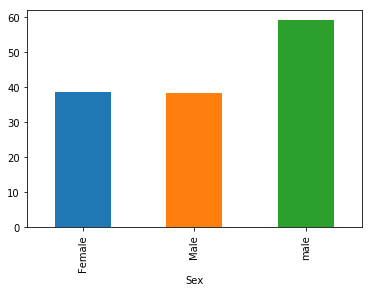

In [8]:
df1.groupby(['Sex']).mean().Age.plot(kind='bar')

In [9]:
df1['Sex'].replace({'male': 'Male'}, inplace=True)

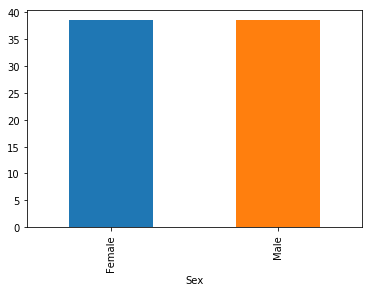

In [10]:
df1.groupby(['Sex']).mean().Age.plot(kind='bar')

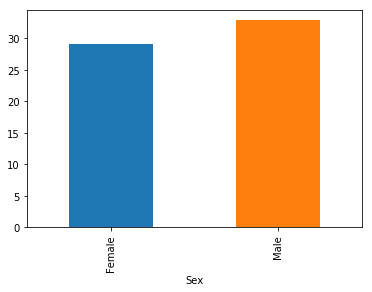

In [11]:
df1.groupby(['Sex']).mean().Pay.plot(kind='bar')

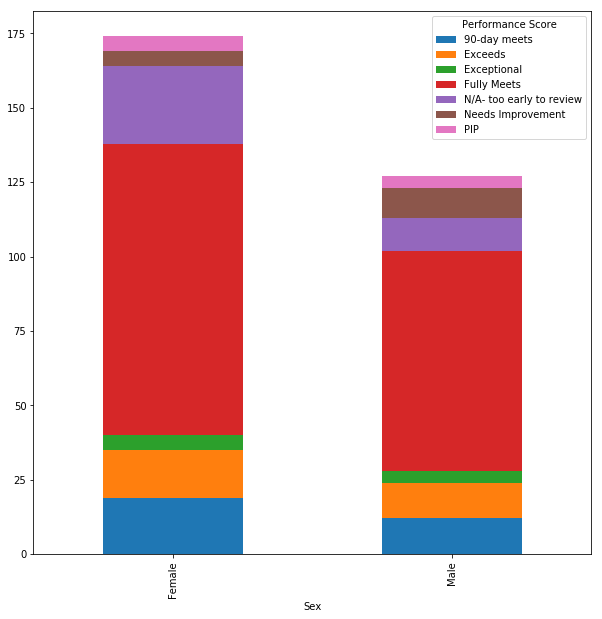

In [12]:
df1.groupby(['Sex', 'Performance Score']).size().unstack().plot(kind='bar', stacked=True, figsize=(10,10))

Text(0.5, 1.0, 'Age vs. Sex')

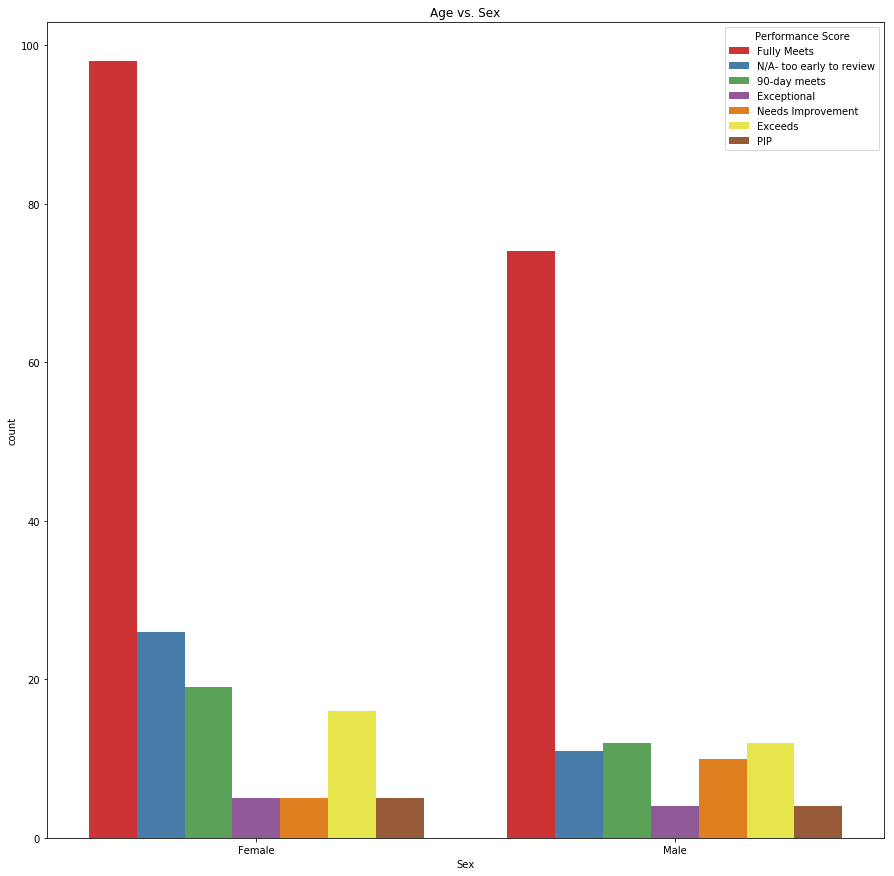

In [13]:
df1['Paymean'] = df1['Pay'].mean()


plt.figure(figsize=(15,15))
sns.countplot(x='Sex', data=df1, hue = 'Performance Score', palette="Set1")
plt.title('Age vs. Sex')

Text(0.5, 1.0, 'Missing value in the dataset')

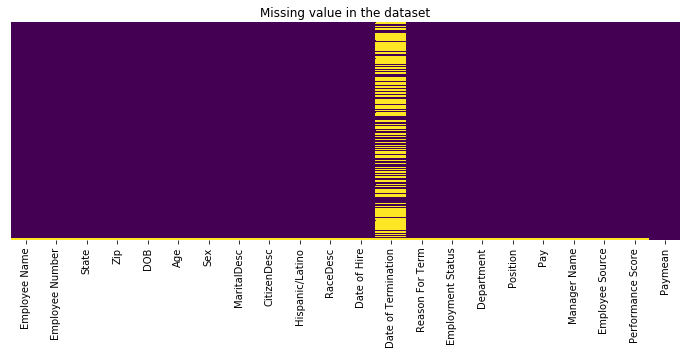

In [14]:
plt.figure(figsize=(12,4))
sns.heatmap(df1.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset')

In [15]:
df1['Performance Score'].value_counts()

Fully Meets                 172
N/A- too early to review     37
90-day meets                 31
Exceeds                      28
Needs Improvement            15
PIP                           9
Exceptional                   9
Name: Performance Score, dtype: int64

C:\Users\lenovo\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\lenovo\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


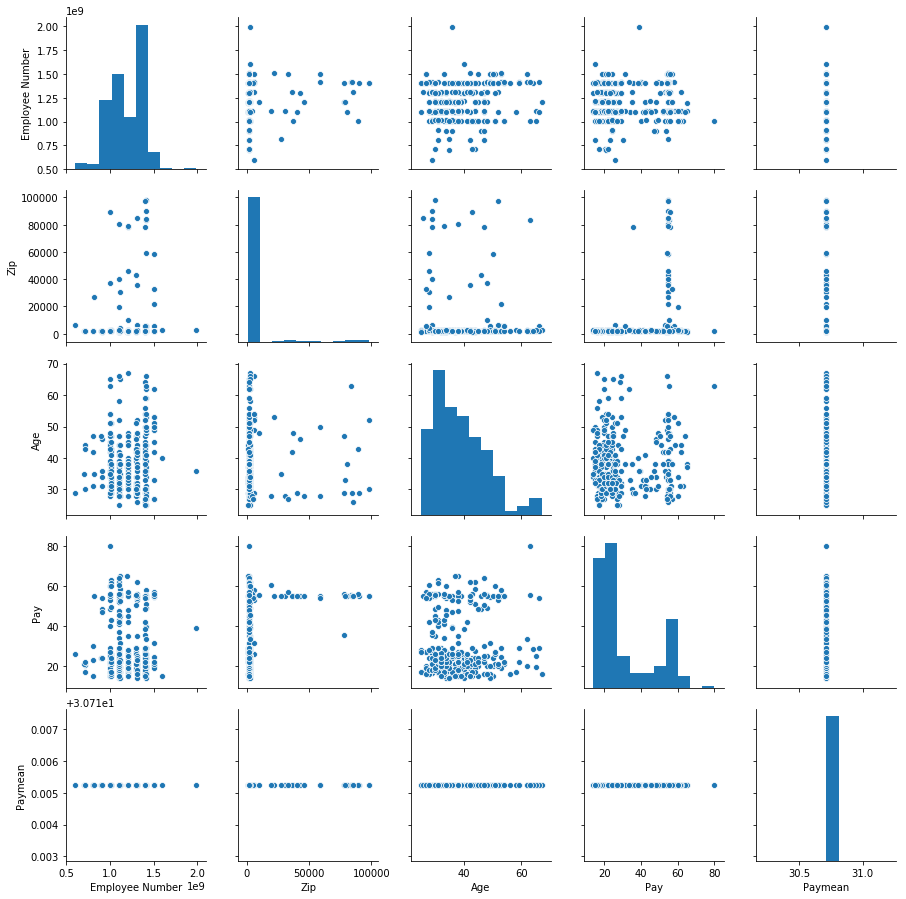

In [16]:
sns.pairplot(df1)

In [17]:
df1.corr()

,Employee Number,Zip,Age,Pay,Paymean
Employee Number,1.000000,0.124567,0.161245,0.019012,NaN
Zip,0.124567,1.000000,-0.013362,0.412814,NaN
Age,0.161245,-0.013362,1.000000,0.016798,NaN
Pay,0.019012,0.412814,0.016798,1.000000,NaN
Paymean,NaN,NaN,NaN,NaN,1.0


In [18]:
df1.drop(columns=['Date of Termination'], inplace=True)

In [19]:
df1.columns

Index(['Employee Name', 'Employee Number', 'State', 'Zip', 'DOB', 'Age', 'Sex',
       'MaritalDesc', 'CitizenDesc', 'Hispanic/Latino', 'RaceDesc',
       'Date of Hire', 'Reason For Term', 'Employment Status', 'Department',
       'Position', 'Pay', 'Manager Name', 'Employee Source',
       'Performance Score', 'Paymean'],
      dtype='object')

In [21]:
df1.drop(columns=['Employee Name', 'Employee Number', 'Reason For Term' , 'Hispanic/Latino', 'Zip', 'DOB', 'Date of Hire', 'Manager Name', 'Position', 'State', 'Paymean'], inplace=True)

In [22]:
df1.sample(10)

,Age,Sex,MaritalDesc,CitizenDesc,RaceDesc,Employment Status,Department,Pay,Employee Source,Performance Score
164,29.0,Male,Married,US Citizen,White,Voluntarily Terminated,Production,18.0,Search Engine - Google Bing Yahoo,Fully Meets
276,33.0,Male,Married,US Citizen,Two or more races,Future Start,Sales,55.0,Website Banner Ads,N/A- too early to review
108,31.0,Female,Single,US Citizen,White,Active,Production,23.0,Newspager/Magazine,Fully Meets
196,32.0,Female,Single,US Citizen,White,Future Start,Production,20.0,Newspager/Magazine,N/A- too early to review
66,62.0,Female,Married,US Citizen,Black or African American,Voluntarily Terminated,Production,33.5,Diversity Job Fair,Fully Meets
138,31.0,Male,Married,US Citizen,White,Active,Production,17.0,Newspager/Magazine,Fully Meets
275,47.0,Male,Single,Eligible NonCitizen,Black or African American,Active,Sales,56.0,Employee Referral,Fully Meets
97,50.0,Male,Married,US Citizen,White,Active,Production,20.0,Professional Society,PIP
25,37.0,Male,Single,US Citizen,Black or African American,Active,IT/IS,65.0,Professional Society,Exceptional
121,34.0,Female,Divorced,US Citizen,White,Voluntarily Terminated,Production,14.0,Monster.com,Fully Meets


In [23]:
df1.columns

Index(['Age', 'Sex', 'MaritalDesc', 'CitizenDesc', 'RaceDesc',
       'Employment Status', 'Department', 'Pay', 'Employee Source',
       'Performance Score'],
      dtype='object')

In [24]:
df1.dropna(inplace=True)

In [25]:
dfcorr = pd.get_dummies(df1)

In [26]:
dfcorr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301 entries, 0 to 300
Data columns (total 59 columns):
Age                                                       301 non-null float64
Pay                                                       301 non-null float64
Sex_Female                                                301 non-null uint8
Sex_Male                                                  301 non-null uint8
MaritalDesc_Divorced                                      301 non-null uint8
MaritalDesc_Married                                       301 non-null uint8
MaritalDesc_Separated                                     301 non-null uint8
MaritalDesc_Single                                        301 non-null uint8
MaritalDesc_widowed                                       301 non-null uint8
CitizenDesc_Eligible NonCitizen                           301 non-null uint8
CitizenDesc_Non-Citizen                                   301 non-null uint8
CitizenDesc_US Citizen                      

In [ ]:

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [27]:
dfcorr.corr()

,Age,Pay,Sex_Female,Sex_Male,MaritalDesc_Divorced,MaritalDesc_Married,MaritalDesc_Separated,MaritalDesc_Single,MaritalDesc_widowed,CitizenDesc_Eligible NonCitizen,...,Employee Source_Vendor Referral,Employee Source_Website Banner Ads,Employee Source_Word of Mouth,Performance Score_90-day meets,Performance Score_Exceeds,Performance Score_Exceptional,Performance Score_Fully Meets,Performance Score_N/A- too early to review,Performance Score_Needs Improvement,Performance Score_PIP
Age,1.000000,0.016798,0.001973,-0.001973,0.008143,-0.010832,0.071256,-0.024577,-0.000059,0.080686,...,0.020140,-0.071622,-0.073452,-0.039169,0.062327,-0.017334,1.238560e-01,-0.161248,-0.070494,0.021994
Pay,0.016798,1.000000,-0.123167,0.123167,-0.089769,0.024949,0.002593,0.050418,-0.057306,0.069884,...,0.151382,0.150899,-0.138029,0.025002,-0.014627,0.089647,-2.767766e-03,-0.065077,0.029922,-0.014045
Sex_Female,0.001973,-0.123167,1.000000,-1.000000,-0.030141,0.030397,0.092860,-0.046520,-0.012863,-0.032213,...,0.071997,-0.050133,-0.017041,0.023897,-0.004309,-0.008005,-1.941927e-02,0.094474,-0.113490,-0.008005
Sex_Male,-0.001973,0.123167,-1.000000,1.000000,0.030141,-0.030397,-0.092860,0.046520,0.012863,0.032213,...,-0.071997,0.050133,0.017041,-0.023897,0.004309,0.008005,1.941927e-02,-0.094474,0.113490,0.008005
MaritalDesc_Divorced,0.008143,-0.089769,-0.030141,0.030141,1.000000,-0.269038,-0.073485,-0.284252,-0.064800,0.045575,...,-0.025230,-0.016132,0.038426,-0.003273,0.046174,0.006707,-2.561263e-02,0.010548,0.025738,-0.058413
MaritalDesc_Married,-0.010832,0.024949,0.030397,-0.030397,-0.269038,1.000000,-0.178592,-0.690820,-0.157484,0.043616,...,-0.060275,0.028762,-0.004664,0.061349,-0.025026,-0.102063,1.373088e-02,-0.012994,0.002179,0.017629
MaritalDesc_Separated,0.071256,0.002593,0.092860,-0.092860,-0.073485,-0.178592,1.000000,-0.188691,-0.043015,-0.045005,...,-0.050581,0.108287,0.030681,-0.074838,0.037893,-0.038775,6.375767e-02,-0.034638,-0.050581,0.053854
MaritalDesc_Single,-0.024577,0.050418,-0.046520,0.046520,-0.284252,-0.690820,-0.188691,1.000000,-0.166389,-0.036554,...,0.113490,-0.049143,-0.016051,-0.001765,0.004309,0.087001,-7.767708e-03,-0.033011,0.020747,-0.031494
MaritalDesc_widowed,-0.000059,-0.057306,-0.012863,0.012863,-0.064800,-0.157484,-0.043015,-0.166389,1.000000,-0.039686,...,-0.044603,-0.041378,-0.041378,-0.065993,-0.062373,0.069766,-4.599986e-02,0.142778,-0.044603,0.069766
CitizenDesc_Eligible NonCitizen,0.080686,0.069884,-0.032213,0.032213,0.045575,0.043616,-0.045005,-0.036554,-0.039686,1.000000,...,-0.046666,0.040240,-0.043293,-0.013178,-0.065259,-0.035774,4.901961e-03,0.078862,0.031370,-0.035774


In [29]:
from sklearn import tree
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [30]:
dfcorr.columns

Index(['Age', 'Pay', 'Sex_Female', 'Sex_Male', 'MaritalDesc_Divorced',
       'MaritalDesc_Married', 'MaritalDesc_Separated', 'MaritalDesc_Single',
       'MaritalDesc_widowed', 'CitizenDesc_Eligible NonCitizen',
       'CitizenDesc_Non-Citizen', 'CitizenDesc_US Citizen',
       'RaceDesc_American Indian or Alaska Native', 'RaceDesc_Asian',
       'RaceDesc_Black or African American', 'RaceDesc_Hispanic',
       'RaceDesc_Two or more races', 'RaceDesc_White',
       'Employment Status_Active', 'Employment Status_Future Start',
       'Employment Status_Leave of Absence',
       'Employment Status_Terminated for Cause',
       'Employment Status_Voluntarily Terminated', 'Department_Admin Offices',
       'Department_Executive Office', 'Department_IT/IS',
       'Department_Production       ', 'Department_Sales',
       'Department_Software Engineering',
       'Department_Software Engineering     ', 'Employee Source_Billboard',
       'Employee Source_Careerbuilder',
       'Employee So

In [31]:
y = df1['Pay']
X = dfcorr.drop(['Pay'], axis=1)

In [35]:
dfcorr

,Age,Pay,Sex_Female,Sex_Male,MaritalDesc_Divorced,MaritalDesc_Married,MaritalDesc_Separated,MaritalDesc_Single,MaritalDesc_widowed,CitizenDesc_Eligible NonCitizen,...,Employee Source_Vendor Referral,Employee Source_Website Banner Ads,Employee Source_Word of Mouth,Performance Score_90-day meets,Performance Score_Exceeds,Performance Score_Exceptional,Performance Score_Fully Meets,Performance Score_N/A- too early to review,Performance Score_Needs Improvement,Performance Score_PIP
0,32.0,28.50,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,33.0,23.00,0,1,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,31.0,29.00,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,32.0,21.50,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,29.0,16.56,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
5,30.0,20.50,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,33.0,55.00,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,33.0,55.00,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
8,30.0,34.95,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9,38.0,34.95,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [36]:
>>> from sklearn.ensemble import RandomForestClassifier
>>> from sklearn.datasets import make_classification

In [38]:
X, y = make_classification(n_samples=1000, n_features=4,
...                            n_informative=2, n_redundant=0,
...                            random_state=0, shuffle=False)

In [43]:
dfcorr.columns

Index(['Age', 'Pay', 'Sex_Female', 'Sex_Male', 'MaritalDesc_Divorced',
       'MaritalDesc_Married', 'MaritalDesc_Separated', 'MaritalDesc_Single',
       'MaritalDesc_widowed', 'CitizenDesc_Eligible NonCitizen',
       'CitizenDesc_Non-Citizen', 'CitizenDesc_US Citizen',
       'RaceDesc_American Indian or Alaska Native', 'RaceDesc_Asian',
       'RaceDesc_Black or African American', 'RaceDesc_Hispanic',
       'RaceDesc_Two or more races', 'RaceDesc_White',
       'Employment Status_Active', 'Employment Status_Future Start',
       'Employment Status_Leave of Absence',
       'Employment Status_Terminated for Cause',
       'Employment Status_Voluntarily Terminated', 'Department_Admin Offices',
       'Department_Executive Office', 'Department_IT/IS',
       'Department_Production       ', 'Department_Sales',
       'Department_Software Engineering',
       'Department_Software Engineering     ', 'Employee Source_Billboard',
       'Employee Source_Careerbuilder',
       'Employee So

In [39]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2,
...                              random_state=0)

In [47]:
df1['Pay'].unique()

array([28.5 , 23.  , 29.  , 21.5 , 16.56, 20.5 , 55.  , 34.95, 80.  ,
       65.  , 43.  , 48.5 , 40.1 , 34.  , 40.  , 35.5 , 41.  , 42.75,
       39.55, 42.2 , 45.  , 30.2 , 31.4 , 62.  , 21.  , 63.  , 64.  ,
       28.99, 26.  , 27.49, 42.  , 37.  , 39.  , 27.  , 47.  , 28.  ,
       49.1 , 61.3 , 58.2 , 58.5 , 54.1 , 56.2 , 53.8 , 53.  , 55.2 ,
       60.  , 54.5 , 50.5 , 51.  , 54.  , 38.5 , 52.  , 33.5 , 20.  ,
       16.  , 22.  , 17.  , 16.76, 18.  , 19.5 , 24.75, 15.  , 15.75,
       19.75, 23.5 , 16.75, 21.25, 24.  , 19.  , 14.  , 15.25, 18.5 ,
       15.2 , 24.5 , 25.  , 24.25, 22.5 , 26.1 , 26.39, 28.75, 56.  ,
       55.5 , 57.  , 60.25, 47.6 , 57.12, 55.51, 52.25, 49.25, 48.  ,
       45.42])

In [60]:
feature_cols = ['Age', 'Pay', 'Sex_Female', 'Sex_Male', 'MaritalDesc_Divorced',
       'MaritalDesc_Married', 'MaritalDesc_Separated', 'MaritalDesc_Single',
       'MaritalDesc_widowed', 
       'Employment Status_Active', 'Employment Status_Future Start',
       'Employment Status_Leave of Absence',
       'Employment Status_Terminated for Cause',
       'Employment Status_Voluntarily Terminated', 'Department_Admin Offices',
       'Department_Executive Office', 'Department_IT/IS',
       'Department_Production       ', 'Department_Sales',
       'Department_Software Engineering',
       'Department_Software Engineering     ', 'Employee Source_Billboard',
       'Employee Source_Careerbuilder',
       'Employee Source_Company Intranet - Partner',
       'Employee Source_Diversity Job Fair',
       'Employee Source_Employee Referral', 'Employee Source_Glassdoor',
       'Employee Source_Information Session',
       'Employee Source_Internet Search', 'Employee Source_MBTA ads',
       'Employee Source_Monster.com', 'Employee Source_Newspager/Magazine',
       'Employee Source_On-campus Recruiting',
       'Employee Source_On-line Web application', 'Employee Source_Other',
       'Employee Source_Pay Per Click',
       'Employee Source_Pay Per Click - Google',
       'Employee Source_Professional Society',
       'Employee Source_Search Engine - Google Bing Yahoo',
       'Employee Source_Social Networks - Facebook Twitter etc',
       'Employee Source_Vendor Referral', 'Employee Source_Website Banner Ads',
       'Employee Source_Word of Mouth', 'Performance Score_90-day meets',
       'Performance Score_Exceptional',
       'Performance Score_N/A- too early to review',
       'Performance Score_Needs Improvement', 'Performance Score_PIP']
X = dfcorr[feature_cols]
y = dfcorr['Performance Score_Exceeds']
X_train, X_test, y_train, y_test=train_test_split(X, y, 
                                                  test_size = 0.25,
                                                  random_state = 123)

In [61]:
clf = RandomForestClassifier(n_estimators=500,criterion = 'entropy', max_depth=5,random_state=123)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

In [62]:
#Classify the test subset using .predict()
y_pred = clf.predict(X_test)

In [63]:

#Calculate the accuracy using metrics.accuracy_score(y_test,y_pred)
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.881578947368421


Text(91.68, 0.5, 'predicted values')

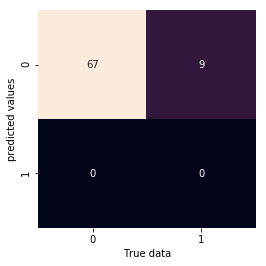

In [64]:
# y_test is a dataframe and to use the function confusion_matrix it is necessary to convert y_test to a list
from sklearn.metrics import confusion_matrix
y_true = y_test.tolist()
mat = confusion_matrix(y_true,y_pred)
sns.heatmap(mat.T, square =True, annot = True, fmt = 'd', cbar= False)
plt.xlabel('True data')
plt.ylabel('predicted values')

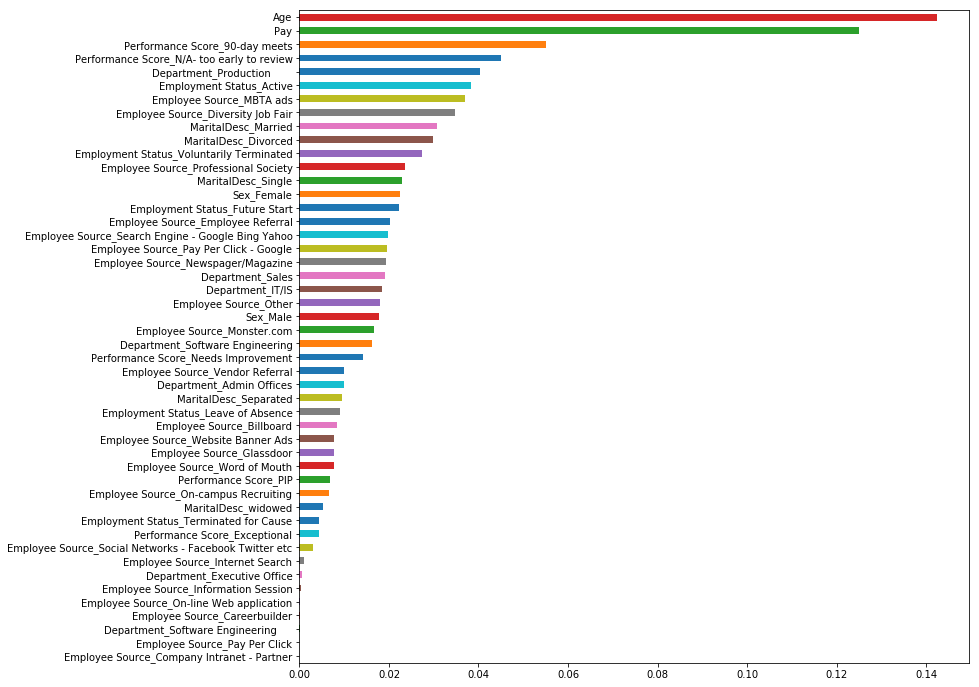

In [65]:
feature_importances = pd.Series(clf.feature_importances_, index = X.columns)
feature_importances = feature_importances.sort_values()
feature_importances.plot(kind='barh', figsize = (12,12))

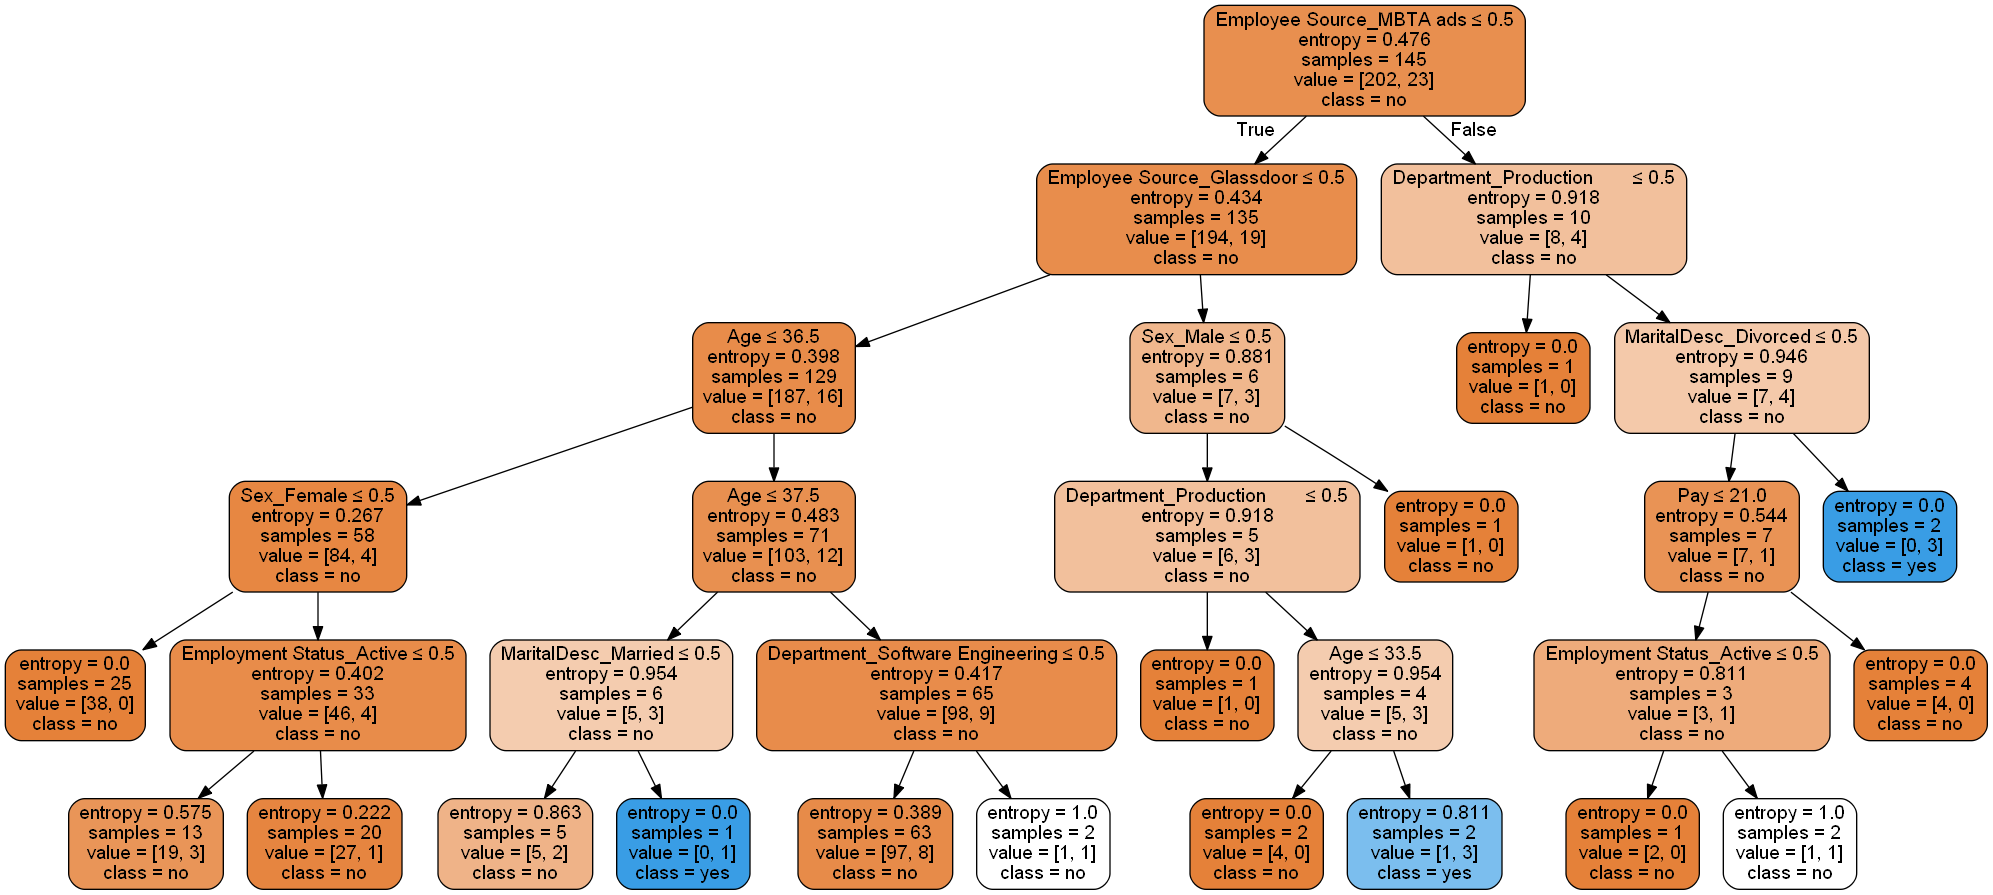

In [66]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
estimator = clf.estimators_[90]
export_graphviz(estimator, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns,class_names = ['no', 'yes'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())